In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')


In [3]:
train_data.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [4]:
test_data.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,IT_265079,2014-01-19,0,3,0,0,0.1,5303
1,IT_265087,2014-01-19,0,268,0,2,1.4,10492
2,IT_265107,2014-01-19,0,320,0,0,13.4,24706
3,IT_265139,2014-01-19,17,358,0,3,5.5,23464
4,IT_265142,2014-01-19,18,23,5,2,0.0,6222


In [5]:
train_data.shape

(9798, 9)

In [6]:
train_data.isnull().sum()

Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Low_Cap_Price       0
High_Cap_Price      0
dtype: int64

In [7]:
test_data.isnull().sum()


Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
High_Cap_Price      0
dtype: int64

In [8]:
train_data.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [9]:
train_data['State_of_Country'].unique()

array([ 0, 11, 17, 18, 20, 21, 22, 23,  1,  2,  3,  4,  5,  6, 19,  8,  9,
       10, 13, 14,  7], dtype=int64)

In [10]:
train_data.drop(['Date'],axis = 1, inplace = True)
train_data.drop(['Item_Id'], axis = 1, inplace = True)

In [11]:
train_data.corr()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
State_of_Country,1.000000,0.122124,0.205858,-0.038140,-0.002647,0.234901,0.027959
Market_Category,0.122124,1.000000,-0.030353,-0.034454,-0.049241,0.198524,0.144557
Product_Category,0.205858,-0.030353,1.000000,-0.056394,0.085874,0.180240,0.114415
Grade,-0.038140,-0.034454,-0.056394,1.000000,0.047414,-0.079639,0.171083
Demand,-0.002647,-0.049241,0.085874,0.047414,1.000000,-0.057482,-0.033971
Low_Cap_Price,0.234901,0.198524,0.180240,-0.079639,-0.057482,1.000000,0.721021
High_Cap_Price,0.027959,0.144557,0.114415,0.171083,-0.033971,0.721021,1.000000


In [12]:
import seaborn as sns

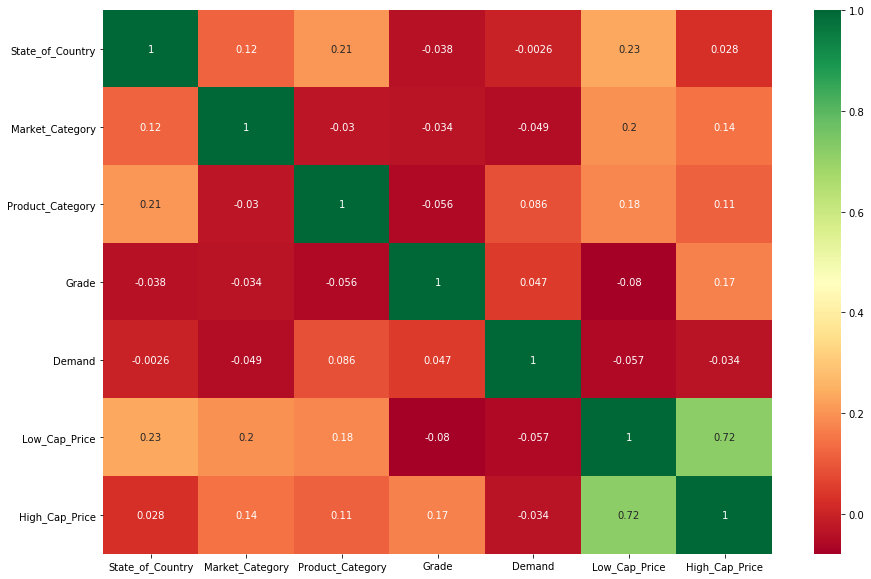

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot = True, cmap='RdYlGn')

In [14]:
X = train_data.drop('Low_Cap_Price', axis =1)
y = train_data['Low_Cap_Price']

In [15]:
###feature importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [16]:
print(model.feature_importances_)

[0.15124328 0.07858446 0.03969259 0.03776433 0.07650389 0.61621146]


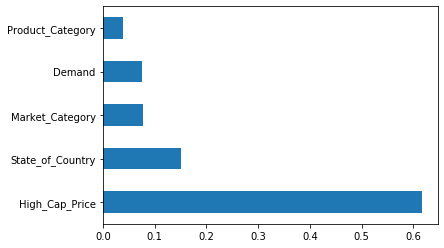

In [17]:
feat_importance = pd.Series(model.feature_importances_,index = X.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  RandomForestRegressor

In [20]:
rf=RandomForestRegressor()
ada = AdaBoostRegressor()
gbr = GradientBoostingRegressor()



In [21]:
###hyperparameters for rf


#numberoftrees in random forest
n_estimators= [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#number of features to consider at every split
max_features = ['auto','sqrt']

#max number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

#Min number of samples required to split a node

min_sample_split = [2,5,10,15,100]

#Min number of samples required at each leaf node

min_samples_leaf = [1,2,5,10]


In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
#create the random grid

random_grid = { 'n_estimators' : n_estimators,
                'max_features' : max_features,
                'max_depth' :max_depth,
                'min_samples_split' : min_sample_split,
                'min_samples_leaf' : min_samples_leaf
}


In [24]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=7,n_jobs=1)

In [25]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   4.3s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   4.0s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   3.9s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   4.1s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.6s
[CV] n_estimators=900, min_samples_split=5, m

[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=400, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [26]:
#Hyperparameters for gradient boosting regressor


n_estimators= [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#learning_rate
learning_rate = [0.1,0.05,0.01]
    
#number of features to consider at every split
max_features = ['auto','sqrt']

#max number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

#Min number of samples required to split a node

min_sample_split = [2,5,10,15,100]

#Min number of samples required at each leaf node

min_samples_leaf = [1,2,5,10]



In [27]:
#create the random grid

random_grid = { 'n_estimators' : n_estimators,
                'learning_rate' :learning_rate,             
                'max_features' : max_features,
                'max_depth' :max_depth,
                'min_samples_split' : min_sample_split,
                'min_samples_leaf' : min_samples_leaf
}


In [28]:
gbr_random = RandomizedSearchCV(estimator=gbr, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=7,n_jobs=1)

In [29]:
gbr_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.1, total=  11.6s
[CV] n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.1, total=  11.6s
[CV] n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.1 
[CV]  n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.1, total=  11.8s
[CV] n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.1 
[CV]  n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.1, total=  11.7s
[CV] n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.1 
[CV]  n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.1, total=  11.7s
[CV] n_estimators=1200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=30, learnin

[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=30, learning_rate=0.1, total=  12.8s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, learning_rate=0.05 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, learning_rate=0.05, total=   3.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, learning_rate=0.05 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, learning_rate=0.05, total=   4.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, learning_rate=0.05 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, learning_rate=0.05, total=   3.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, learning_rate=0.05 
[CV]

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [30]:
##Hyperparameters for ADA boosting regressor


n_estimators= [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#learning_rate
learning_rate = [0.1,0.05,0.01]
    

#loss

loss = ['linear', 'square', 'exponential']






In [31]:
#create the random grid

random_grid = { 'n_estimators' : n_estimators,
                'learning_rate' :learning_rate,             
                'loss':loss
}


In [32]:
ada_random = RandomizedSearchCV(estimator=ada, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=7,n_jobs=1)

In [33]:
ada_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, loss=square, learning_rate=0.05 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, loss=square, learning_rate=0.05, total=   1.9s
[CV] n_estimators=400, loss=square, learning_rate=0.05 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=400, loss=square, learning_rate=0.05, total=   1.9s
[CV] n_estimators=400, loss=square, learning_rate=0.05 ...............
[CV]  n_estimators=400, loss=square, learning_rate=0.05, total=   1.9s
[CV] n_estimators=400, loss=square, learning_rate=0.05 ...............
[CV]  n_estimators=400, loss=square, learning_rate=0.05, total=   1.8s
[CV] n_estimators=400, loss=square, learning_rate=0.05 ...............
[CV]  n_estimators=400, loss=square, learning_rate=0.05, total=   1.8s
[CV] n_estimators=100, loss=square, learning_rate=0.01 ...............
[CV]  n_estimators=100, loss=square, learning_rate=0.01, total=   0.6s
[CV] n_estimators=100, loss=square, learning_rate=0.01 ...............
[CV]  n_estimators=100, loss=square, learning_rate=0.01, total=   0.6s
[CV] n_estimators=100, loss=square, learning_rate=0.01 ...............
[CV]  n_estimators=100, loss=square, learning_rate=0.01, total=   0.6s
[CV] n_estimators=100, loss=square, learning_rate=0.01 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   pre_dispatch='2*n_jobs', random_state=7, refit=True,
                   return_train_score=False, 

In [36]:
pred1=rf_random.predict(X_test)
pred2 = gbr_random.predict(X_test)
pred3 = ada_random.predict(X_test)

In [37]:
finalpred=(pred1*0.5+pred2*0.3+pred3*0.2)

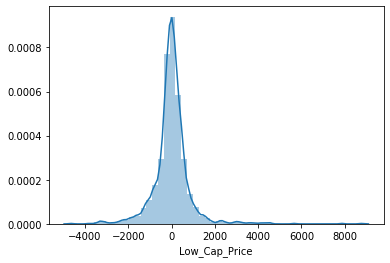

In [39]:
sns.distplot(y_test-finalpred)

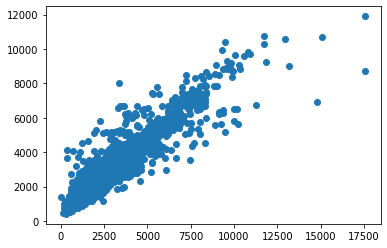

In [40]:
plt.scatter(y_test,finalpred)

In [108]:
test_data.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,IT_265079,2014-01-19,0,3,0,0,0.1,5303
1,IT_265087,2014-01-19,0,268,0,2,1.4,10492
2,IT_265107,2014-01-19,0,320,0,0,13.4,24706
3,IT_265139,2014-01-19,17,358,0,3,5.5,23464
4,IT_265142,2014-01-19,18,23,5,2,0.0,6222


In [109]:
test_data.drop(['Date'],axis = 1, inplace = True)


In [110]:
test_data.head()

,Item_Id,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,IT_265079,0,3,0,0,0.1,5303
1,IT_265087,0,268,0,2,1.4,10492
2,IT_265107,0,320,0,0,13.4,24706
3,IT_265139,17,358,0,3,5.5,23464
4,IT_265142,18,23,5,2,0.0,6222


In [111]:
item_id = test_data['Item_Id']

In [112]:
test_data.drop(['Item_Id'],axis = 1,inplace=True)

In [113]:
test_data.head()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,0,3,0,0,0.1,5303
1,0,268,0,2,1.4,10492
2,0,320,0,0,13.4,24706
3,17,358,0,3,5.5,23464
4,18,23,5,2,0.0,6222


In [114]:
y_pred1=rf_random.predict(test_data)

In [115]:
y_pred2= gbr_random.predict(test_data)
y_pred3= ada_random.predict(test_data)


In [118]:
y_pred=(y_pred1*0.5+y_pred2*0.3+y_pred3*.2)

In [119]:
y_pred

array([3329.12571871, 3061.89530244, 4781.79480544, ..., 6480.43184074,
       5310.96790881, 6622.16705913])

In [120]:
test_data['Low_Cap_Price'] = y_pred

In [121]:
test_data['Item_Id'] = item_id

In [122]:

df_new=pd.DataFrame(test_data,columns={'Item_Id','Low_Cap_Price'})

In [123]:
df_new = df_new[['Item_Id', 'Low_Cap_Price']]

In [124]:
df_new

,Item_Id,Low_Cap_Price
0,IT_265079,3329.125719
1,IT_265087,3061.895302
2,IT_265107,4781.794805
3,IT_265139,7276.175736
4,IT_265142,2092.677966
...,...,...
5758,IT_361691,6308.898355
5759,IT_361694,5834.035980
5760,IT_361699,6480.431841
5761,IT_361719,5310.967909


In [125]:
df_new.to_csv(r"D:\sem2\YOUTUBE\lowest_price\submission_new.csv",index=False)

In [127]:
models = []
models.append(rf_random)
models.append(gbr_random)
models.append(ada_random)

In [129]:
with open("models.pkl", "wb") as f:
    for model in models:
         pickle.dump(model, f)